# Label Distribution
This notebook shows the statistics of the generated dataset. Please run it after running "step5_gpt_predicted_labels" to see the distributions of generated labels.

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 0. Define the Distribution Visualisation Function

In [24]:
def label_distribution(df, filter=False, title='Label distribution'):
    '''
    This function plots the distribution of labels in the dataset.
    The input elements are: Dataframe, filter (default False), title (default 'Label distribution')
    If filter is set to True, the function will remove the 'O' labels from the plot.
    '''
    if filter:
        df = df[df['label'] != 'O']
    else:
        df = df

    # Calculate label counts and proportions
    label_counts = df['label'].value_counts()
    label_proportions = label_counts / label_counts.sum()

    # Bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(label_counts.index, label_counts.values)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add porportions as text on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{(yval/df.shape[0]*100):.1f}%', ha='center', va='bottom')

    plt.show()


# 1. Training Set Label Distribution

## 1.1 Combine all training files

In [8]:
# Combine all the training data into a single DataFrame

folder_path = './response_data/dataset'
train_filepath = './response_data/dataset/train.tsv'

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Process all training files 
for i, file in enumerate(os.listdir(folder_path)):
    if file.endswith('.tsv') and 'dev' not in file and 'test' not in file:
        file_path = os.path.join(folder_path, file)
        
        if file.endswith('.tsv'):
            # Add headers once
            if i == 0:
                temp_df = pd.read_csv(file_path, sep='\t')
            else:
                temp_df = pd.read_csv(file_path, sep='\t', header=0)
            
            # Concat first df and rest of the dfs
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)


## 1.2 Process the labels in the training dataframe

In [9]:
# Get all 'event' columns
event_columns = [col for col in combined_df.columns if col.startswith('event')]

# Define a function to calculate the new column 'label'
def process_label(row):
    events = row[event_columns].tolist()
    for event in events:
        if event != 'O':
            return event
    return 'O'

# Apply the function to create the new column 'label'
combined_df['label'] = combined_df.apply(process_label, axis=1)

# Fill NaN values in the 'label' column with 'O'
combined_df['label'] = combined_df['label'].fillna('O')


# Save to a new tsv file
result = combined_df[['conversation', 'sent_id', 'token_id', 'token', 'label']]
result.to_csv(train_filepath, sep='\t', index=False, encoding='utf-8')

## 3. Plot

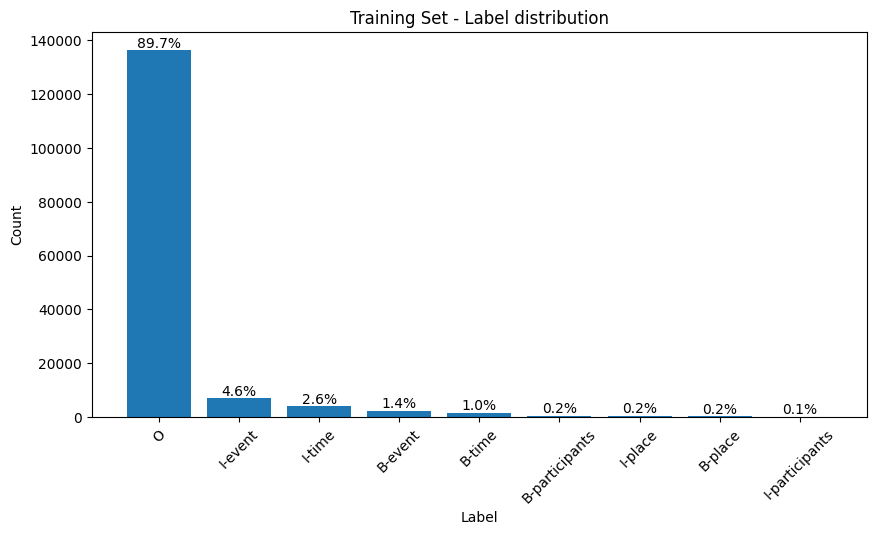

In [30]:
# Label distribution with 'O' label
label_distribution(combined_df, filter=False, title='Training Set - Label distribution')

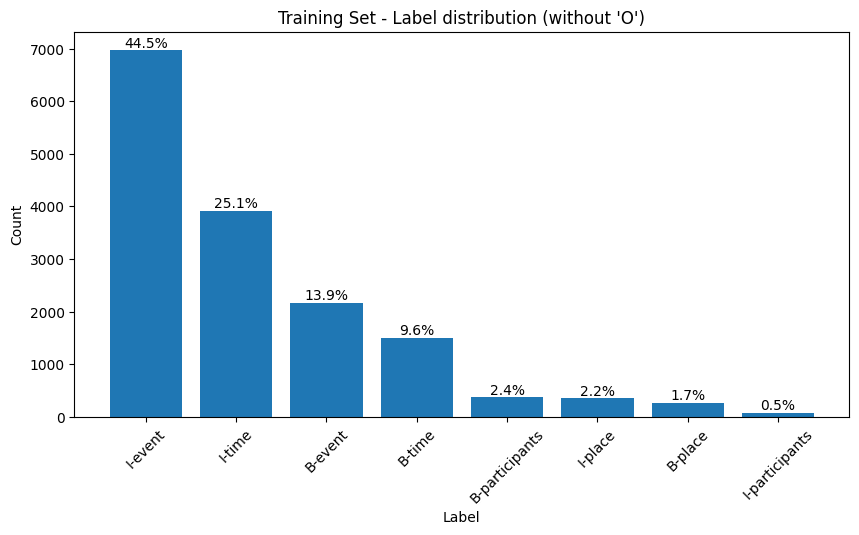

In [29]:
# Label distribution without 'O' label
label_distribution(combined_df, filter=True, title='Training Set - Label distribution (without \'O\')')

# 4. Development Set

In [25]:
df_dev = pd.read_csv('./response_data/dataset/[nltk]annotation_dev_processed.tsv', sep='\t')

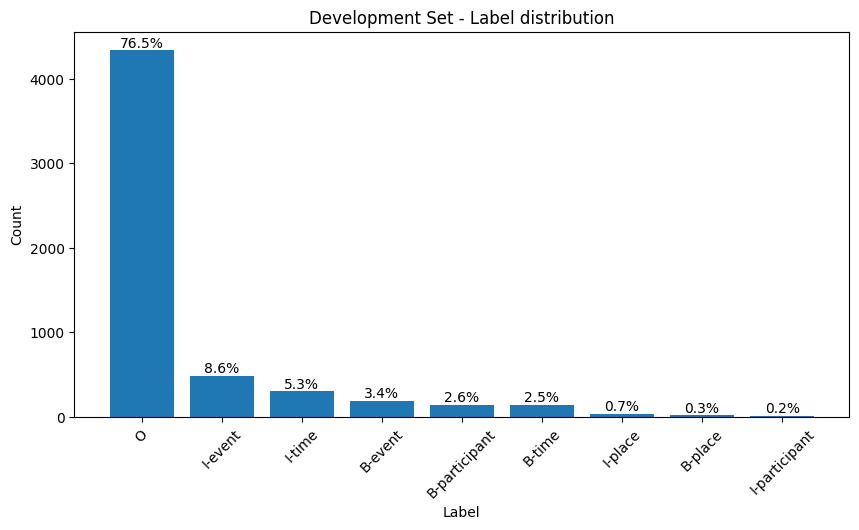

In [27]:
# Label distribution with 'O' label
label_distribution(df_dev, filter=False, title='Development Set - Label distribution')

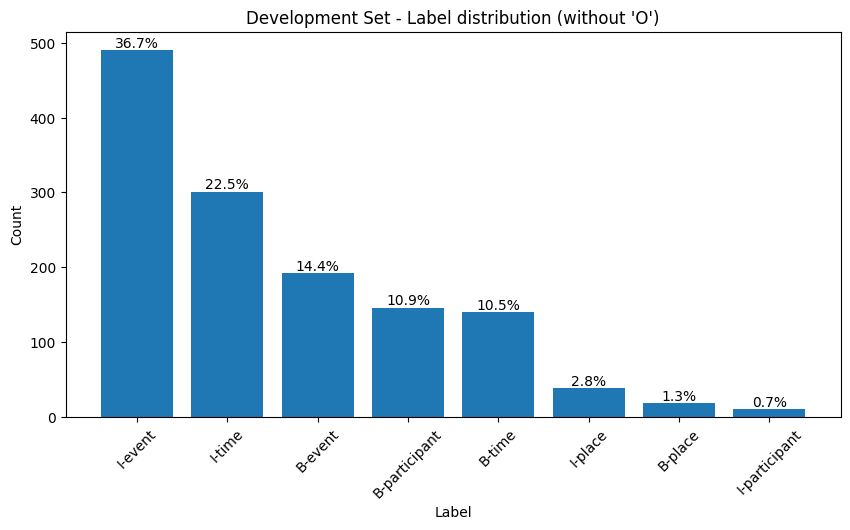

In [28]:
# Label distribution without 'O' label
label_distribution(df_dev, filter=True, title='Development Set - Label distribution (without \'O\')')

# 5. Test Set

In [31]:
df_test = pd.read_csv('./response_data/dataset/annotation_test_processed.tsv', sep='\t')

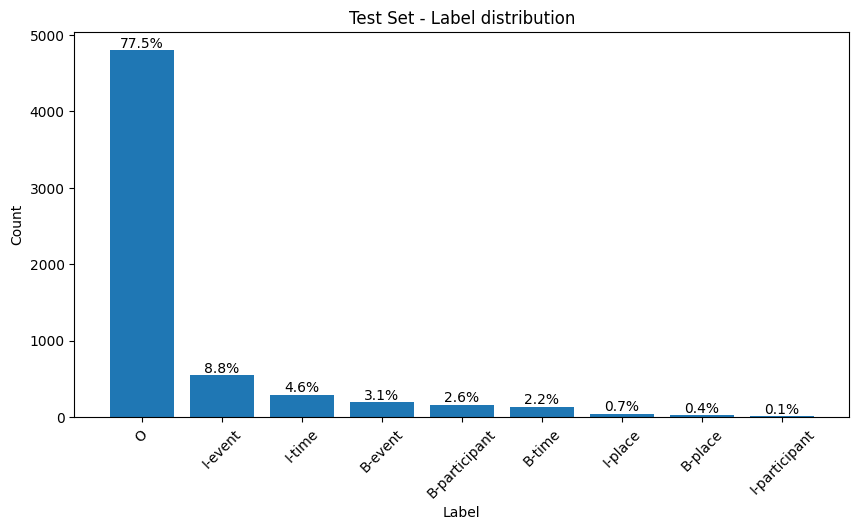

In [32]:
# Label distribution with 'O' label
label_distribution(df_test, filter=False, title='Test Set - Label distribution')

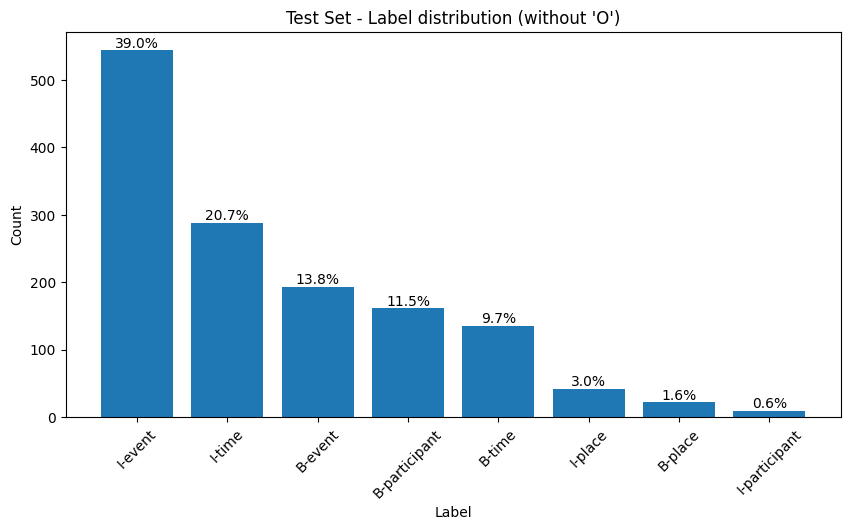

In [33]:
# Label distribution without 'O' label
label_distribution(df_test, filter=True, title='Test Set - Label distribution (without \'O\')')